<a href="https://colab.research.google.com/github/GenoKiller777/PythonVarios/blob/main/AB_Testing_test_hipotesis_DarwinJoanPerezAvendano.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [48]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving abtest.csv to abtest (1).csv
User uploaded file "abtest.csv" with length 408 bytes


# Inferencia Estadística.







## Caso de Estudio: Empres e-commerce

###  Cargar librerias y dataset.

In [98]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [50]:
dat = pd.read_csv('abtest.csv')

**1.** Imagine que ud. trabaja en una empresa de e-commerce, que está testeando un nuevo diseño de página web. El objetivo es lograr un aumento en la tasa de conversión (porcentaje de usuarios que realiza una compra) de al menos un 2%.

Para el testeo, se diseña un experimento en base a dos grupos:

> Grupo control (A): se les muestra la página original.

> Grupo de tratamiento (B): se les muestra el nuevo diseño.

Para cada grupo, se monitorea la actividad en la página web y se asigna una tasa de conversión de acuerdo a la siguiente regla:

    0 - El usuario no compró el producto durante la sesión en la página web.
    1 - El usuario si compró el producto durante la sesión en la página web.

El experimento se desarrolla durante un mes, y para cada día se reporta la tasa de conversión promedio de cada grupo. Los datos están contenidos en el archivo `abtest.csv`.

Para este caso, diseñe e implemente un testeo A/B que permita determinar si el diseño de la nueva página es o no efectivo. (40 pts)

**R. 40 puntos si cumple lo solicitado, debe recomendar la página luego del análisis
Descontar: 10 puntos si no comenta los resultados, otros
10 puntos depende sugiere la recomendación de la nueva página o no**

## **1.** Analísis exploratorio y limpieza de conjuntos de datos

In [51]:
dat.describe().T

,count,mean,std,min,25%,50%,75%,max
Day,30.0,15.500000,8.803408,1.00,8.2500,15.500,22.7500,30.00
Conversion_A,30.0,0.162000,0.036141,0.10,0.1325,0.165,0.1875,0.23
Conversion_B,30.0,0.193333,0.027334,0.15,0.1800,0.190,0.2000,0.27


In [108]:
dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Day           30 non-null     int64  
 1   Conversion_A  30 non-null     float64
 2   Conversion_B  30 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 848.0 bytes


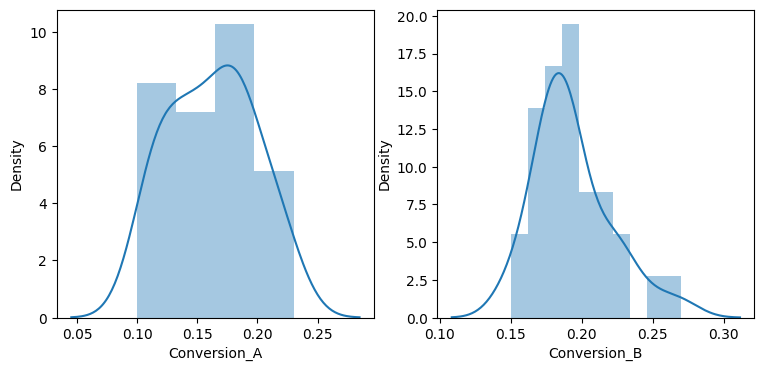

In [82]:
import warnings
warnings.filterwarnings("ignore")

fig, axs = plt.subplots(ncols = 2,figsize = (9,4))

sns.distplot(dat.Conversion_A, ax = axs[0], label = "A")
sns.distplot(dat.Conversion_B, ax = axs[1], label = "B")
plt.show()

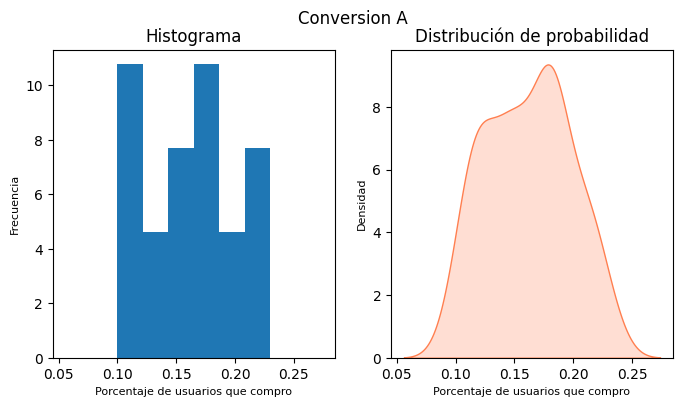

In [78]:
figure, axes = plt.subplots(1, 2, sharex=True, figsize=(8,4))
figure.suptitle('Conversion A')

axes[0].set_title('Histograma')
axes[1].set_title('Distribución de probabilidad')

axes[0].set_xlabel('Porcentaje de usuarios que compro', fontsize = 8)
axes[0].set_ylabel('Frecuencia', fontsize = 8)

axes[1].set_xlabel('Porcentaje de usuarios que compro', fontsize = 8)
axes[1].set_ylabel('Densidad', fontsize = 8)

# Histograma
axes[0].hist(dat['Conversion_A'], bins = 'auto' , density=True)
# Gráfica de distribución
sns.kdeplot(ax=axes[1], data = dat, x = 'Conversion_A', bw_adjust= 0.8, color='coral', fill =True)

plt.show()

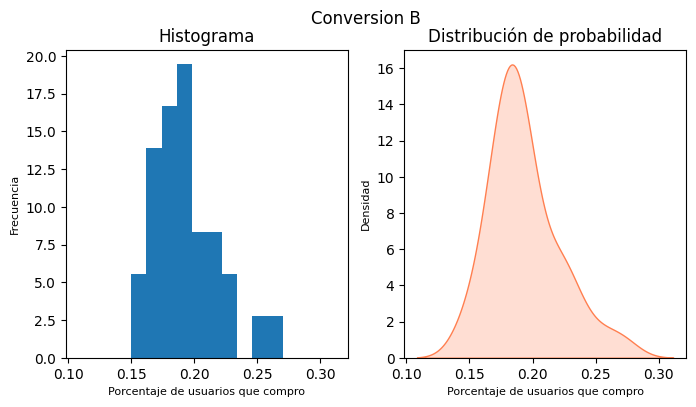

In [77]:
figure, axes = plt.subplots(1, 2, sharex=True, figsize=(8,4))
figure.suptitle('Conversion B')

axes[0].set_title('Histograma')
axes[1].set_title('Distribución de probabilidad')

axes[0].set_xlabel('Porcentaje de usuarios que compro', fontsize = 8)
axes[0].set_ylabel('Frecuencia', fontsize = 8)

axes[1].set_xlabel('Porcentaje de usuarios que compro', fontsize = 8)
axes[1].set_ylabel('Densidad', fontsize = 8)

# Histograma
axes[0].hist(dat['Conversion_B'], bins = 'auto' , density=True)
# Gráfica de distribución
sns.kdeplot(ax=axes[1], data = dat, x = 'Conversion_B', bw_adjust=1, color='coral', fill =True)

plt.show()

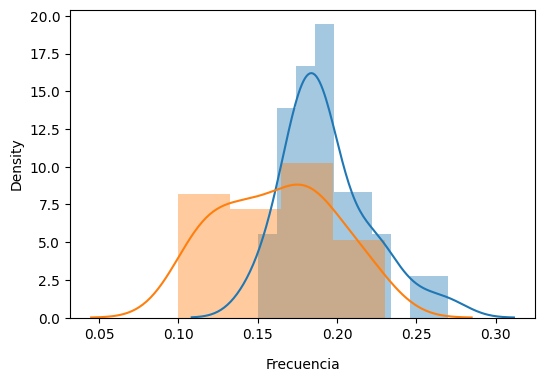

In [83]:
plt.figure(figsize = (6,4))

sns.distplot(dat.Conversion_B, hist = True, label ="B")
sns.distplot(dat.Conversion_A, hist = True, label ="A")
plt.xlabel("Valor", labelpad = 12)
plt.xlabel("Frecuencia", labelpad = 12)

plt.show()

<Figure size 600x400 with 0 Axes>

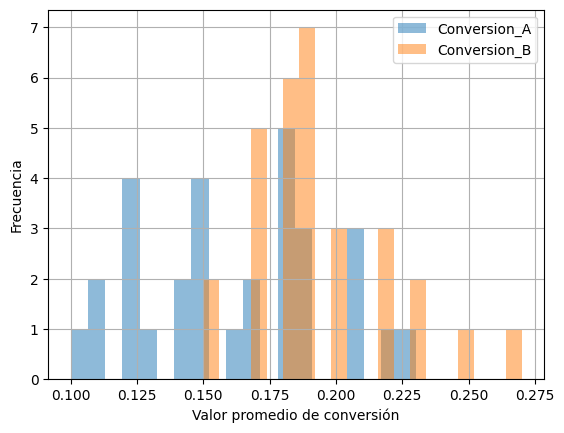

In [103]:
plt.figure(figsize = (6,4))
fig, ax = plt.subplots()

ax.hist(dat['Conversion_A'], bins = 20, alpha = 0.5, label = 'Conversion_A')
ax.hist(dat['Conversion_B'], bins = 20, alpha = 0.5, label = 'Conversion_B')

ax.set_xlabel('Valor promedio de conversión')
ax.set_ylabel('Frecuencia')
ax.legend()
ax.grid()

plt.show()

In [86]:
df_melt= dat.melt(id_vars = ['Day '],
                      var_name = 'Grupo',
                      value_name = 'Tasa_Conversion')

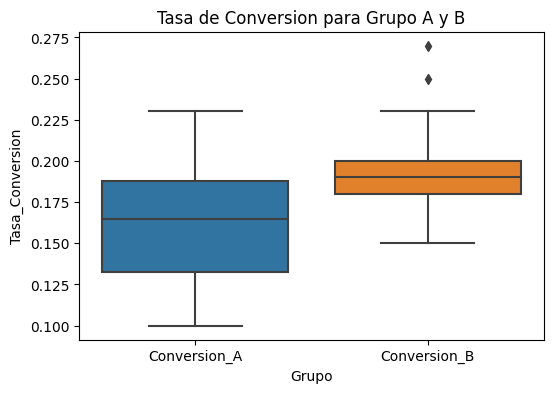

In [87]:
plt.figure(figsize = (6,4))

box2 = sns.boxplot(x = 'Grupo',
                   y = 'Tasa_Conversion',
                   data = df_melt)

box2.set_title("Tasa de Conversion para Grupo A y B")
plt.show()

In [93]:
A = df_melt[df_melt["Grupo"] == 'Conversion_A']
B = df_melt[df_melt["Grupo"] == 'Conversion_B']

diferencia_promedio = round(B['Tasa_Conversion'].mean()-A['Tasa_Conversion'].mean(),4 )
diferencia_varianza = round(B['Tasa_Conversion'].var()-A['Tasa_Conversion'].var(),4 )

print(f"La diferencia del promedio de las tasas de B y A es de: {diferencia_promedio}, y la diferencia de varianza entre la tasas A y B es de {diferencia_varianza}.")

La diferencia del promedio de las tasas de B y A es de: 0.0313, y la diferencia de varianza entre la tasas A y B es de -0.0006.


## **2.** Plantear Hipótesis

$H_{0}$ = No hay diferencias significativas entre la Tasa de Conversión promedio del grupo A y la Tasa de Conversión promedio del grupo B.

$H_{1}$ = Hay diferencias significativas entre la Tasa de Conversión promedio del grupo A y la Tasa de Conversión promedio del grupo B.





## **3.** Aplicación de Pruebas

### Test igualdad de Varianzas

**Test de Levene**:

_Prueba estadística inferencial utilizada para evaluar la igualdad de las varianzas para una variable calculada para dos o más grupos._

$H_{0}$ = Las varianzas de los grupos no son diferentes (Iguales) - || $\sigma^{2}_{1} = \sigma^{2}_{2} $||.

$H_{1}$ = Las varianzas de los grupos son diferentes - || $\sigma^{2}_{1} \neq \sigma^{2}_{2} $||.

In [94]:
from scipy.stats import levene

levene(dat.Conversion_B, dat.Conversion_A)

LeveneResult(statistic=5.392311404214254, pvalue=0.023757520229066957)

**R.** Se rechaza la hipótesis nula de que las varianzas del Grupo A es igual a la del Grupo B, por lo cual se asume el No Rechazo de que las varianzas del Grupo A y el Grupo B son diferentes.

### Test igualdad de Medias

**Prueba T**:

_Prueba estadística inferencial para averiguar si hay una diferencia real entre las medias (promedios) de dos grupos diferentes._

$H_{0}$ = Las medias de los grupos son iguales - || $\mu^{2}_{1} = \mu^{2}_{2} $||.

$H_{1}$ = Las medias de los grupos no son iguales - || $\mu^{2}_{1} \neq \mu^{2}_{2} $||.

In [95]:
import scipy.stats  as ss

t_stat, p_val = ss.ttest_ind(dat.Conversion_B, dat.Conversion_A, equal_var = False)
t_stat, p_val

(3.78736793091929, 0.00038453573945864804)

**R.-** Se rechaza la Ho, de que "No hay diferencias significativas entre la media de la tasa de conversión del grupo A con la media de la tasa de  conversión del grupo B" y se concluye que "existe una diferencia significativa entre la media del grupo A y del grupo B", con un p-value de 0.000384 que es menor de 0.05 del nivel de significancia (0.000384 < 0.05).

El grupo B tiene mayor tráfico de web en promedio que el grupo A, por lo cual se debe hacer el cambio de la "Coversión A" a la "Conversión B".

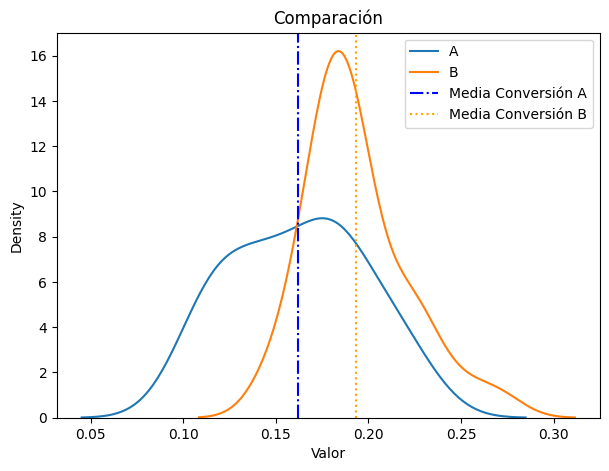

In [117]:
plt.figure(figsize = (7,5))

sns.kdeplot(dat.Conversion_A, label = "A")
sns.kdeplot(dat.Conversion_B, label = "B")

plt.xlabel('Valor')

plt.axvline(x = dat.Conversion_A.mean(), color = 'blue', linestyle = 'dashdot', label = "Media Conversión A")
plt.axvline(x = dat.Conversion_B.mean(), color = 'orange', linestyle = 'dotted', label = "Media Conversión B")

plt.title("Comparación")
plt.legend()

plt.show()